In [1]:
test_dataset_new = r'NWPU_lowy400test'

In [2]:
import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#tensorflow for ResNet50
import tensorflow.python.keras as k
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.initializers import random_uniform, glorot_uniform
from tensorflow.keras.models import Model
#sklearn for confusion matrix
import itertools
from sklearn.metrics import confusion_matrix, confusion_matrix
%matplotlib inline

In [3]:
img_height = 64 
img_width = 64
dataset_u = r'NWPU_lowy400test'
batch_size = 32
validation_split=0.2
rescale=1.0/255

In [4]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=rescale)

In [5]:
model  = tf.keras.models.load_model('CNN_16_epoch')


2023-10-11 11:12:34.883568: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
final_test_dataset = test_datagen.flow_from_directory(batch_size=batch_size,
                                                      directory=test_dataset_new,
                                                      shuffle=True, 
                                                      target_size=(img_height, img_width),
                                                      class_mode='categorical')


Found 13500 images belonging to 45 classes.


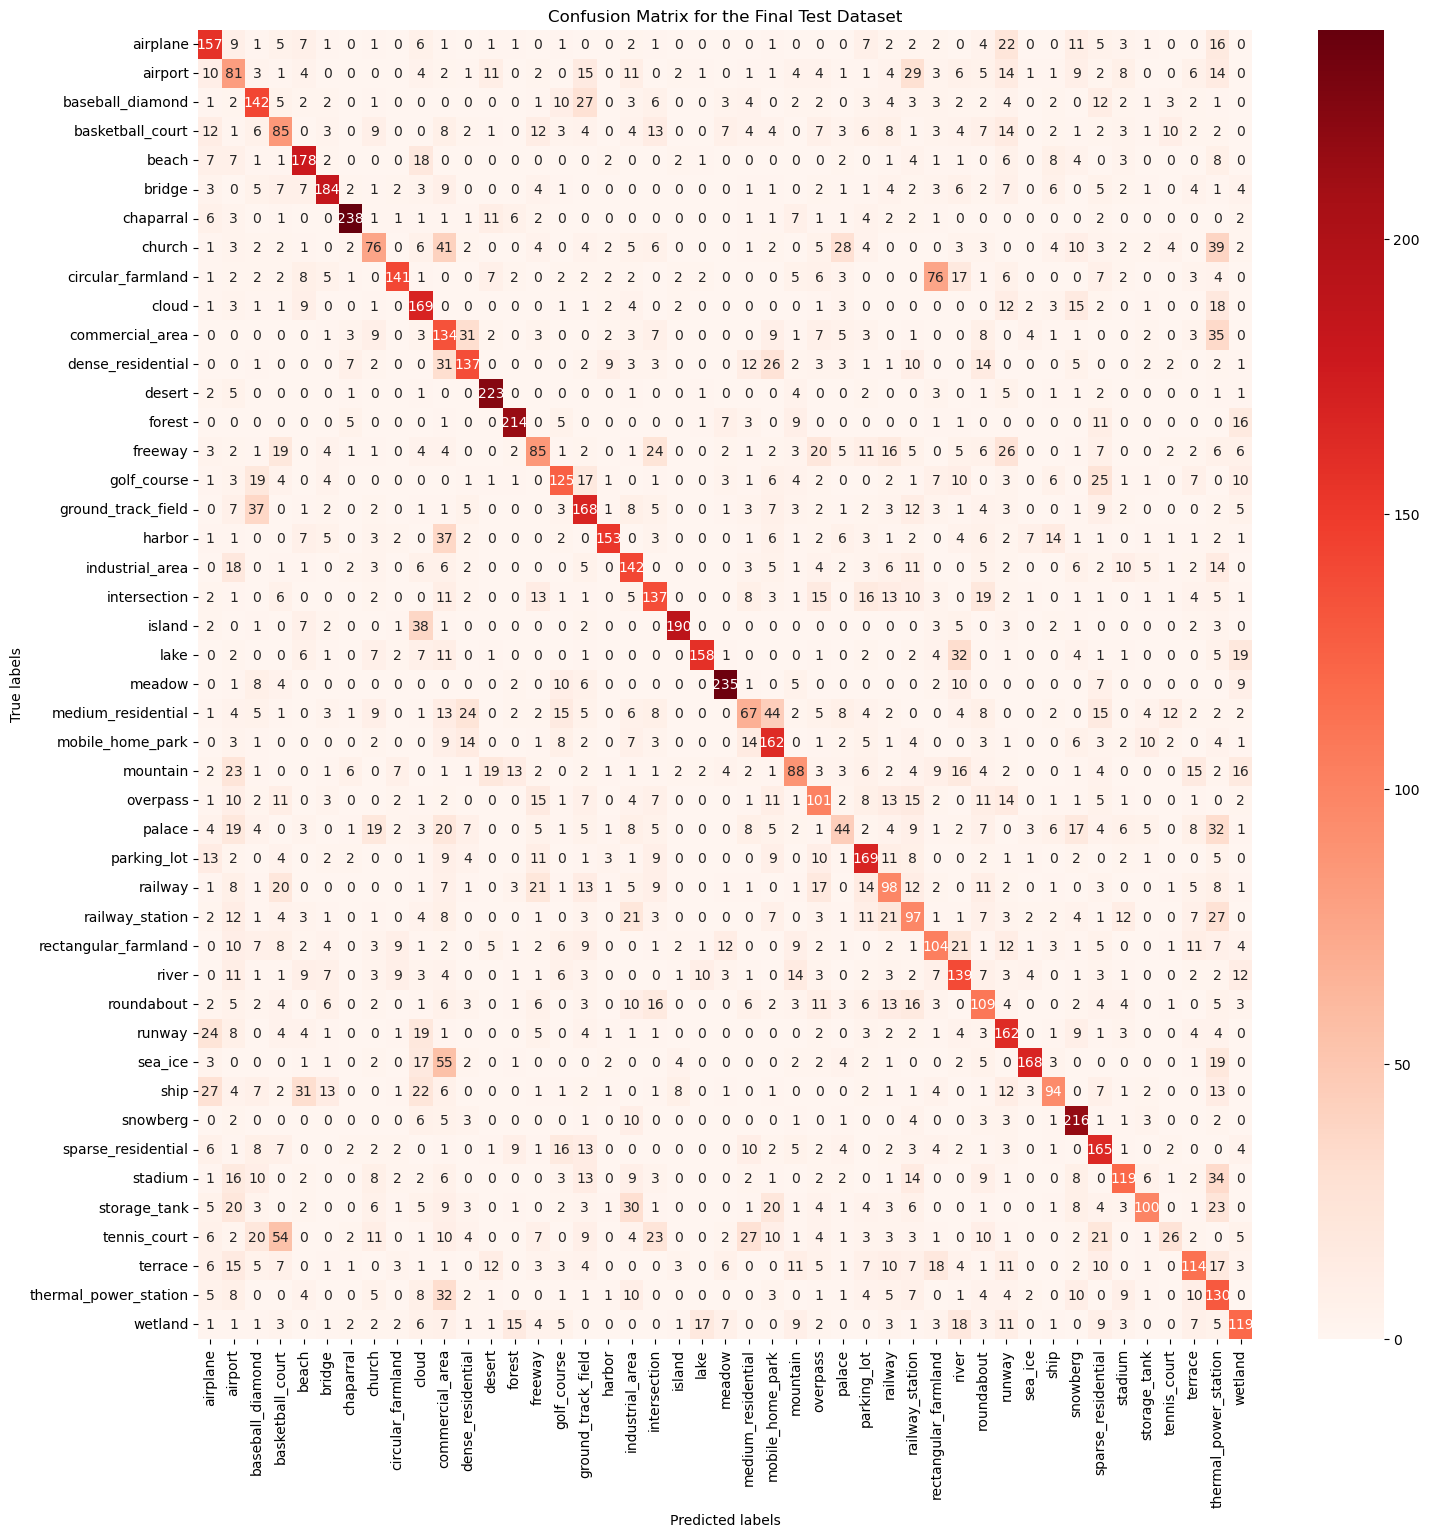

Final Test Accuracy: 0.4975


In [11]:
y_pred = []  #predicted values
y_true = []  #true values

for i, (image_batch, label_batch) in enumerate(final_test_dataset):
    y_true.append(label_batch)
    preds = model.predict(image_batch)
    y_pred.append(np.argmax(preds, axis=1))
    if i == 385:#562:  
        break

#concatenate the results
correct_labels = tf.concat([item for item in y_true], axis=0)
correct_labels = np.argmax(correct_labels, axis=1)
predicted_labels = tf.concat([item for item in y_pred], axis=0)


cm = confusion_matrix(correct_labels, predicted_labels)

folders = os.listdir('NWPU_lowy400test')

plt.figure(figsize=(17, 17))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', xticklabels=folders, yticklabels=folders)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for the Final Test Dataset')
plt.show()

# accuracy calculation
accuracy = cm.diagonal().sum() / cm.sum()
print(f"Final Test Accuracy: {accuracy:.4f}")


In [12]:


results = model.evaluate(final_test_dataset)


422/422 [==============================] - 321s 761ms/step - loss: 2.3848 - accuracy: 0.4972


In [13]:
print(results)

[2.3847761154174805, 0.4971851706504822]
